In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
dataset = pd.read_csv("Loan Prediction Dataset.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [470]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [471]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# PreProcessing of data

In [472]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [473]:
#fill missing values for numerical terms -> mean
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

In [474]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [475]:
print(dataset['Gender'].mode())
print("Actual required value =>",dataset['Gender'].mode()[0])

0    Male
dtype: object
Actual required value => Male


In [476]:
#fill missing values for Categorical terms ->mode (Most common term)
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [477]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Creation of New Attributes

In [478]:
#Total Income
dataset['Total_Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']

In [479]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

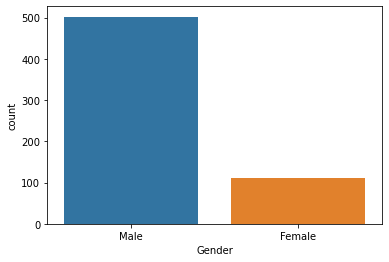

In [480]:
#Categorical Attributes
sns.countplot(x=dataset['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

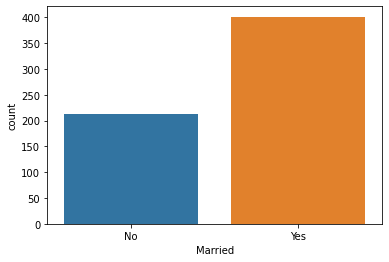

In [481]:
sns.countplot(x=dataset['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

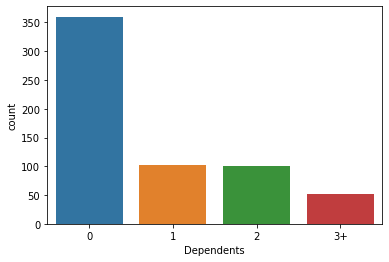

In [482]:
sns.countplot(x=dataset['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

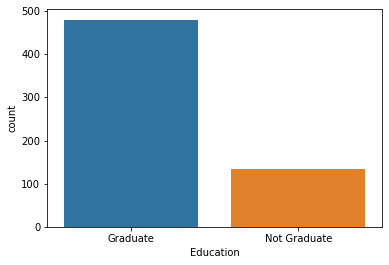

In [483]:
sns.countplot(x=dataset['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

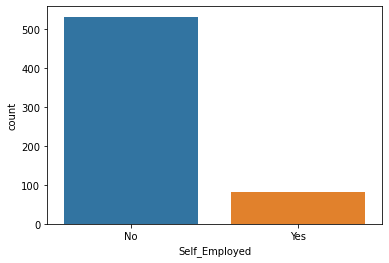

In [484]:
sns.countplot(x=dataset['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

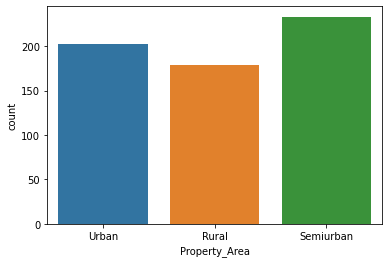

In [485]:
sns.countplot(x=dataset['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

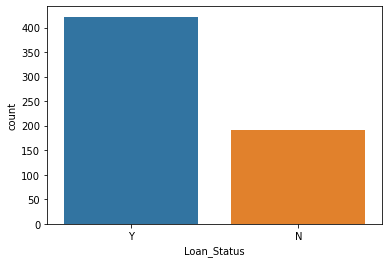

In [486]:
sns.countplot(x=dataset['Loan_Status'])

# Histograms and Log transformations for all numerical attributes

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

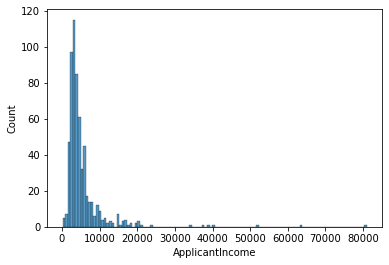

In [487]:
# Numerical Attributes
sns.histplot(dataset['ApplicantIncome'])

In [488]:
#apply log Transformations to the attribute so that it'll be better for training the data(Left-Skewed data is present)
dataset['ApplicantIncomelog']=np.log(dataset['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Count'>

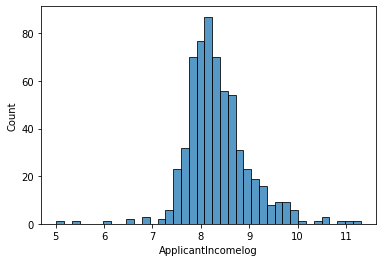

In [489]:
sns.histplot(dataset['ApplicantIncomelog'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

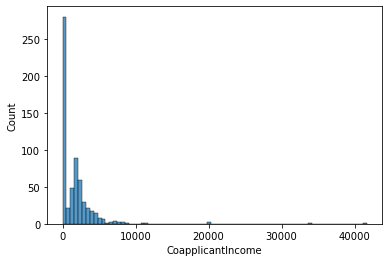

In [490]:
sns.histplot(dataset['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

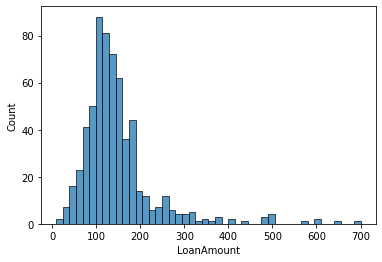

In [491]:
 sns.histplot(dataset['LoanAmount'])

In [492]:
dataset['LoanAmountlog']=np.log(dataset['LoanAmount'])

<AxesSubplot:xlabel='LoanAmountlog', ylabel='Count'>

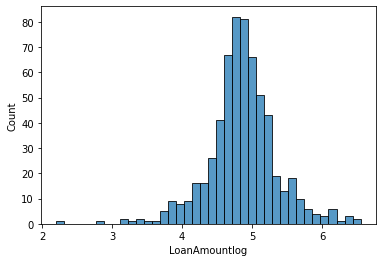

In [493]:
sns.histplot(dataset['LoanAmountlog'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

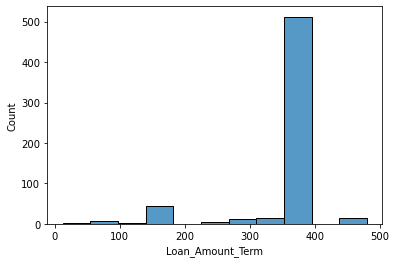

In [494]:
sns.histplot(dataset['Loan_Amount_Term'])

In [495]:
dataset['Loan_Amount_Termlog']=np.log(dataset['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Termlog', ylabel='Count'>

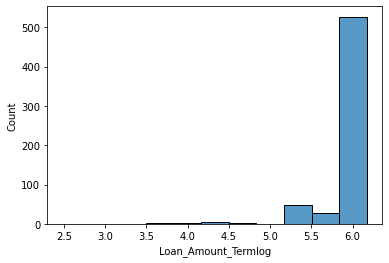

In [496]:
sns.histplot(dataset['Loan_Amount_Termlog'])

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

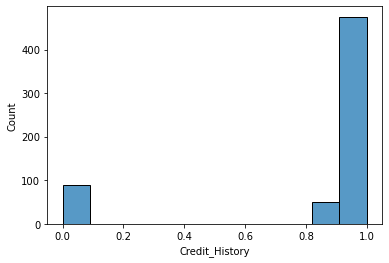

In [497]:
sns.histplot(dataset['Credit_History'])

<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

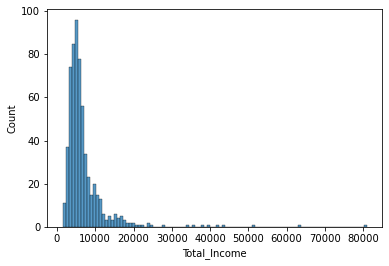

In [498]:
sns.histplot(dataset['Total_Income'])

In [499]:
dataset['Total_Income_log']=np.log(dataset['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Count'>

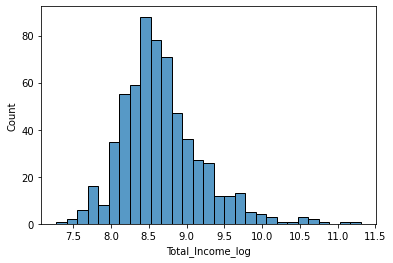

In [500]:
sns.histplot(dataset['Total_Income_log'])

In [501]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


# Correlation Matrix

In [502]:
corr = dataset.corr()


In [503]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Income_log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.434849,-0.024085,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.204179,-0.042941,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,0.086531,0.938871,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.025248,-0.007860,0.019156
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.503817,-0.042237,0.852873
ApplicantIncomelog,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,0.491066,-0.014618,0.740300
LoanAmountlog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,1.000000,0.084534,0.657507
Loan_Amount_Termlog,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,0.084534,1.000000,-0.029522
Total_Income_log,0.717829,0.383827,0.687552,-0.055320,0.019156,0.852873,0.740300,0.657507,-0.029522,1.000000


<AxesSubplot:>

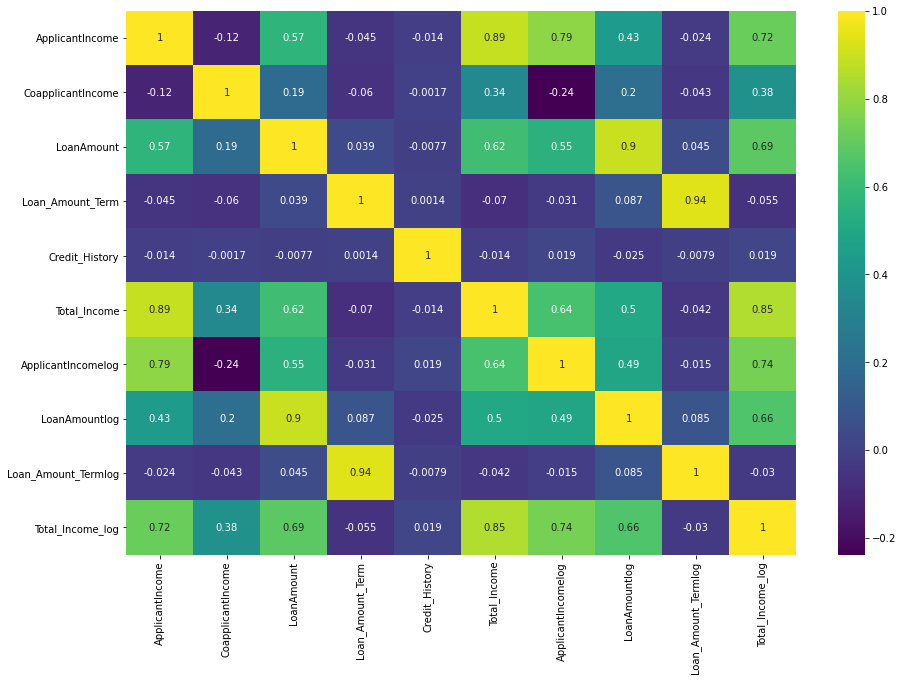

In [504]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='viridis')

# Drop unnecessary Columns

In [505]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomelog', 'LoanAmountlog',
       'Loan_Amount_Termlog', 'Total_Income_log'],
      dtype='object')

In [506]:
dataset.drop(columns=['Loan_ID','ApplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncome'],axis=1,inplace=True)

In [507]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# LABEL ENCODING

In [508]:
from sklearn.preprocessing import LabelEncoder

In [509]:
le = LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']


In [510]:
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])

In [511]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train_Test_Split

In [512]:
X = dataset.drop(columns=['Loan_Status'],axis=1)
y = dataset['Loan_Status']

In [513]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,8.699515,4.948760,5.886104,8.699515


In [514]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [515]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) 

# MODEL TRAINING

In [516]:
# classify function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def classify(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) 
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
#     print("Accuracy is::",model.score(X_test,y_test)*100)
    print("Accuracy score is::",accuracy_score(predictions,y_test))
    #Cross Validation -> used for better validation  of model
    # eg: cv=5, train=4, test=1 (like this it'll break the examples and shuffle 5 times)
    score = cross_val_score(model,X,y,cv=5)
    print("Cross Validation is::",np.mean(score))    #5 scores as it runs 5 times

In [517]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
classify(model,X,y)

Accuracy score is:: 0.7727272727272727
Cross Validation is:: 0.809462881514061


In [518]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

classify(model,X,y)

Accuracy score is:: 0.7077922077922078
Cross Validation is:: 0.7085165933626549


In [519]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

model = RandomForestClassifier()
classify(model,X,y)
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy score is:: 0.7922077922077922
Cross Validation is:: 0.7785285885645742
Accuracy score is:: 0.7402597402597403
Cross Validation is:: 0.7671464747434359


# HYPERPARAMETER TUNING

In [520]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=12,max_depth=25,max_features=1)
classify(model,X,y)

Accuracy score is:: 0.7792207792207793
Cross Validation is:: 0.8045715047314408


# CONFUSION MATRIX

In [521]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [522]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm= confusion_matrix(y_test,y_pred)
cm

array([[23, 31],
       [ 6, 94]], dtype=int64)

<AxesSubplot:>

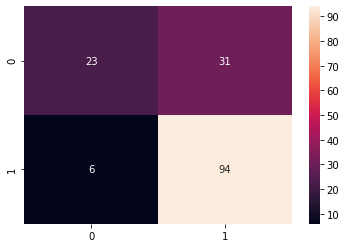

In [523]:
sns.heatmap(cm,annot=True)